In [1]:
cd /home

/home


In [35]:
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
import numpy as np

from src.models import get_ASTROMER_II
from src.data import load_data

os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
off_nsp = True
data = load_data('./data/records/atlas/fold_0/atlas_50/test/',
                    batch_size=500,
                    window_size=10,
                    probed=0.5,
                    random_same=.2,
                    sampling=True,
                    nsp_prob=.5,
                    test_mode=True,
                    off_nsp=off_nsp)

[INFO] Sampling random windows
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-08-09 12:38:56.589100: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: UNKNOWN ERROR (34)
2023-08-09 12:38:56.589129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (02a5f91920fd): /proc/driver/nvidia/version does not exist
2023-08-09 12:38:56.589367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[INFO] TESTING MODE


In [25]:
astromer = get_ASTROMER_II(num_layers=2,
                           num_heads=4,
                           head_dim=64,
                           mixer_size=256,
                           dropout=.3955,
                           pe_base=1000,
                           pe_dim=256,
                           pe_c=1,
                           window_size=10,
                           encoder_mode='normal',
                           average_layers=False,
                           off_nsp=True)

encoder = astromer.get_layer('encoder')

In [90]:
for x, y in data.take(1):
    _, w = encoder(x)
    print(x['att_mask'][0])
    print(w.shape)

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
(500, 4, 10, 10)


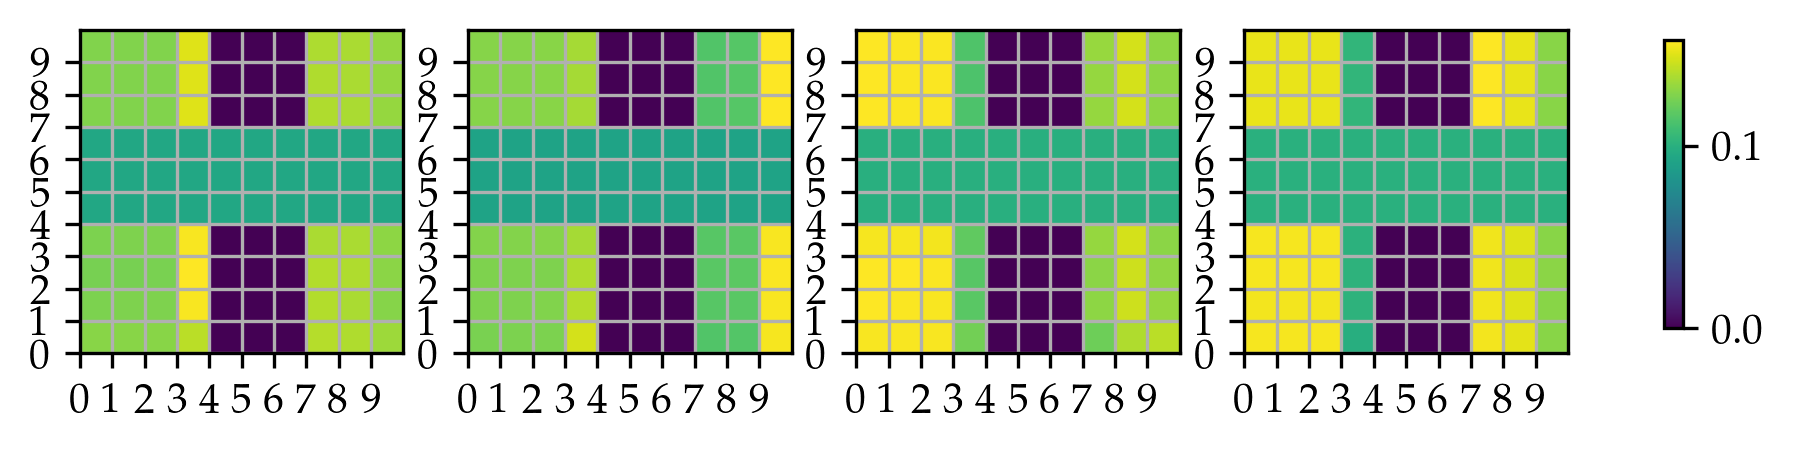

In [91]:
fig, axes = plt.subplots(1, 4, dpi=300)
for i in range(4):
    print()
    im = axes[i].imshow(w[0, i], extent=(0, 10, 0, 10))
    axes[i].set_xticks(range(10))
    axes[i].set_yticks(range(10))
    axes[i].grid()
cbar_ax = fig.add_axes([0.95, 0.4, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax)